In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib import cm

In [2]:
# Start and end dates
start_date = "2016-01-01"
end_date = "2024-01-01"

# Base model
base_model1 = pd.read_csv("/home/tomas/aedes/parameters/sensitivity_parameters/base_model.csv")

# Convert date column to datetime format and filter by date range
base_model1['date'] = pd.to_datetime(base_model1['date'])
base_model1 = base_model1[(base_model1['date'] >= start_date) & (base_model1['date'] <= end_date)]

# Column Adults 'A'
base_adults1 = base_model1['A']

# variations (%)
factor_variations1 = [-0.5, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, -0.01, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5]

# Parameters
multiplicative_factors1 = [
    'mp_factor', 'ml_factor', 'elr_factor', 'lpr_factor', 'par_factor', 
    'ovr1_factor', 'ovr2_factor', 'a0_factor', 'valpha_factor', 'egn', 'me', 'ef', 
    'mdlr', 'ma'
]

# Labels
factor_names1 = {
    'mp_factor': 'Pupal mortality (mp) (**)',
    'ml_factor': 'Larval mortality (ml) (**)',
    'elr_factor': 'Egg hatching rate (elr) (**)',
    'lpr_factor': 'Larval development \n rate (lpr) (**)',
    'par_factor': 'Pupal development rate (par) (**)',
    'ovr1_factor': 'Gonotrophic cycle coefficient  \n for adult1 (ovr1) (**)',
    'ovr2_factor': 'Gonotrophic cycle coefficient  \n for adult2 (ovr2) (**)',
    'a0_factor': 'larval density where hatching  \n fraction changes (a0) (***)',
    'valpha_factor': 'Larval density-dependent \n mortality (\u03B1) (*)',
    'egn': 'Number of eggs laid per \n oviposition (egn) (*)',
    'me': 'Egg mortality (me) (*)',
    'ef': 'Emergence factor (ef) (*)',
    'mdlr': 'Larval mortality rate on \n dry container (mdlr) (*)',
    'ma': 'Adult mortality (ma) (*)'
}

# Simulations
results_path1 = "/home/tomas/aedes/parameters/sensitivity_parameters/"

# Iterate on parameters and variations
results1 = []
for factor in multiplicative_factors1:
    for variation1 in factor_variations1:
        output_filename1 = os.path.join(results_path1, f"{factor}_var{int(variation1 * 100)}.csv")
        
        try:
            model_data1 = pd.read_csv(output_filename1)

            model_data1['date'] = pd.to_datetime(model_data1['date'])
            model_data1 = model_data1[(model_data1['date'] >= start_date) & (model_data1['date'] <= end_date)]
            
            predicted_adults1 = model_data1['A']
            
            mapd1 = np.mean(np.abs((base_adults1 - predicted_adults1) / base_adults1)) * 100

            difference_sign1 = '+' if (predicted_adults1 - base_adults1).mean() > 0 else '-'
            results1.append({
                'factor': factor,
                'factor_full_name1': factor_names1[factor],  # Usar el nombre completo del factor
                'variation1': variation1,
                'MAPD1': mapd1,
                'MAPD_with_sign1': f"{difference_sign1}{mapd1:.1f}"
            })
        
        except FileNotFoundError:
            print(f"Archivo no encontrado: {output_filename1}")
            continue

# Convert results to a DataFrame
results_df1 = pd.DataFrame(results1)

# Variations to percentages and order them
results_df1['variation1'] = (results_df1['variation1'] * 100).astype(int).astype(str) + '%'

# Order
results_df1['variation1'] = pd.to_numeric(results_df1['variation1'].str.replace('%', ''))  # Convertir de nuevo a número
results_df1 = results_df1.sort_values(by='variation1')  # Ordenar por la variación

# Pivot
pivot_mapd1 = results_df1.pivot(index='factor_full_name1', columns='variation1', values='MAPD1')
pivot_mapd_with_sign1 = results_df1.pivot(index='factor_full_name1', columns='variation1', values='MAPD_with_sign1')

# Rows in descending order
pivot_mapd1 = pivot_mapd1.loc[pivot_mapd1.max(axis=1).sort_values(ascending=False).index]
pivot_mapd_with_sign1 = pivot_mapd_with_sign1.loc[pivot_mapd1.index]

In [3]:
# Start and end dates
start_date = "2016-01-01"
end_date = "2024-01-01"

# Base model
base_model2 = pd.read_csv("/home/tomas/aedes/parameters/sensitivity_parameters/base_model.csv")

# Convert date column to datetime format and filter by date range
base_model2['date'] = pd.to_datetime(base_model2['date'])
base_model2 = base_model2[(base_model2['date'] >= start_date) & (base_model2['date'] <= end_date)]

# Column Adults 'A'
base_adults2 = base_model2['A']

# variations (%)
tp_rh_p_variations2 = [-0.2, -0.1, -0.05, -0.02, -0.01, 0.01, 0.02, 0.05, 0.1, 0.2]

# variables
tp_rh_p_factors2 = ['T', 'P', 'RH']

# Labels
factor_names2 = {
    'T':'Mean temperature (T)',
    'P': 'Precipitation (P)',
    'RH': 'Relative Humidity (RH)'
}


# Simulations
results_path2 = "/home/tomas/aedes/parameters/sensitivity_ambientales/"

# Iterate on parameters and variations
mapd_results_meteorological2 = []
for factor in tp_rh_p_factors2:
    for variation2 in tp_rh_p_variations2:
        output_filename2 = os.path.join(results_path2, f"variation_{factor}_{int(variation2 * 100)}.csv")
        
        try:
            model_data2 = pd.read_csv(output_filename2)

            model_data2['date'] = pd.to_datetime(model_data2['date'])
            model_data2 = model_data2[(model_data2['date'] >= start_date) & (model_data2['date'] <= end_date)]
            
            predicted_adults2 = model_data2['A']
            
            mapd2 = np.mean(np.abs((base_adults2 - predicted_adults2) / base_adults2)) * 100
            
            if predicted_adults2.mean() > base_adults2.mean():  
                mapd_sign2 = "+"
            else:  
                mapd_sign2 = "-"
            
            difference_sign2 = '+' if (predicted_adults2 - base_adults2).mean() > 0 else '-'
            mapd_results_meteorological2.append({
                'factor': factor,
                'factor_full_name2': factor_names2[factor],
                'variation2': variation2,
                'MAPD2': mapd2,
                'MAPD_with_sign2': f"{difference_sign2}{mapd2:.1f}"
            })
        
        except FileNotFoundError:
            print(f"Archivo no encontrado: {output_filename2}")
            continue

# Convert results to a DataFrame
mapd_df_meteorological2 = pd.DataFrame(mapd_results_meteorological2)


# Variations to percentages and order them
mapd_df_meteorological2['variation2'] = (mapd_df_meteorological2['variation2'] * 100).astype(int).astype(str) + '%'

# Order
mapd_df_meteorological2['variation2'] = pd.to_numeric(mapd_df_meteorological2['variation2'].str.replace('%', ''))  # Convertir de nuevo a número
mapd_df_meteorological2 = mapd_df_meteorological2.sort_values(by='variation2')

# Pivot
pivot_mapd2 = mapd_df_meteorological2.pivot(index='factor_full_name2', columns='variation2', values='MAPD2')
pivot_mapd_with_sign2 = mapd_df_meteorological2.pivot(index='factor_full_name2', columns='variation2', values='MAPD_with_sign2')

# Rows in descending order
pivot_mapd2 = pivot_mapd2.loc[pivot_mapd2.max(axis=1).sort_values(ascending=False).index]
pivot_mapd_with_sign2 = pivot_mapd_with_sign2.loc[pivot_mapd2.index]

In [4]:
# Start and end dates
start_date = "2016-01-01"
end_date = "2024-01-01"

# Base model
base_model3 = pd.read_csv("/home/tomas/aedes/parameters/sensitivity_results_contenedores_porcent/base_model.csv")

# Convert date column to datetime format and filter by date range
base_model3['date'] = pd.to_datetime(base_model3['date'])
base_model3 = base_model3[(base_model3['date'] >= start_date) & (base_model3['date'] <= end_date)]

# Column Adults 'A'
base_adults3 = base_model3['A']

# variations (%)
factor_variations3 = [-0.5, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, -0.01, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5]

# Parameters
multiplicative_factors3 = [
    'level_height', 
    #'surface', 
    #'initial_water', 
    #'manually_filled', 
    #'bare', 
    'evaporation_factor'
]

# Labels
factor_names3 = {'level_height': 'Container \n level height (clh)', 
                 'surface': 'surface', 
                 'initial_water': 'initial_water', 
                 'manually_filled': 'manually_filled', 
                 'bare': 'Bare', 
                 'evaporation_factor': 'Evaporation factor (BS_ef)'}

# Simulations
results_path3 = "/home/tomas/aedes/parameters/sensitivity_results_contenedores_porcent/"

# Iterate on parameters and variations
results3 = []
for factor in multiplicative_factors3:
    for variation3 in factor_variations3:
        output_filename3 = os.path.join(results_path3, f"{factor}_var{int(variation3 * 100)}.csv")
        
        try:
            model_data3 = pd.read_csv(output_filename3)

            model_data3['date'] = pd.to_datetime(model_data3['date'])
            model_data3 = model_data3[(model_data3['date'] >= start_date) & (model_data3['date'] <= end_date)]
            
            predicted_adults3 = model_data3['A']
            
            mapd3 = np.mean(np.abs((base_adults3 - predicted_adults3) / base_adults3)) * 100
            
            difference_sign3 = '+' if (predicted_adults3 - base_adults3).mean() > 0 else '-'
            results3.append({
                'factor': factor,
                'factor_full_name3': factor_names3[factor],  
                'variation3': variation3,
                'MAPD3': mapd3,
                'MAPD_with_sign3': f"{difference_sign3}{mapd3:.1f}"
            })
        
        except FileNotFoundError:
            print(f"Archivo no encontrado: {output_filename3}")
            continue

# Convert results to a DataFrame
results_df3 = pd.DataFrame(results3)

# Variations to percentages and order them
results_df3['variation3'] = (results_df3['variation3'] * 100).astype(int).astype(str) + '%'

# Order
results_df3['variation3'] = pd.to_numeric(results_df3['variation3'].str.replace('%', ''))  # Convertir de nuevo a número
results_df3 = results_df3.sort_values(by='variation3')  # Ordenar por la variación

# Pivot
pivot_mapd3 = results_df3.pivot(index='factor_full_name3', columns='variation3', values='MAPD3')
pivot_mapd_with_sign3 = results_df3.pivot(index='factor_full_name3', columns='variation3', values='MAPD_with_sign3')

# Rows in descending order
pivot_mapd3 = pivot_mapd3.loc[pivot_mapd3.max(axis=1).sort_values(ascending=False).index]
pivot_mapd_with_sign3 = pivot_mapd_with_sign3.loc[pivot_mapd3.index]

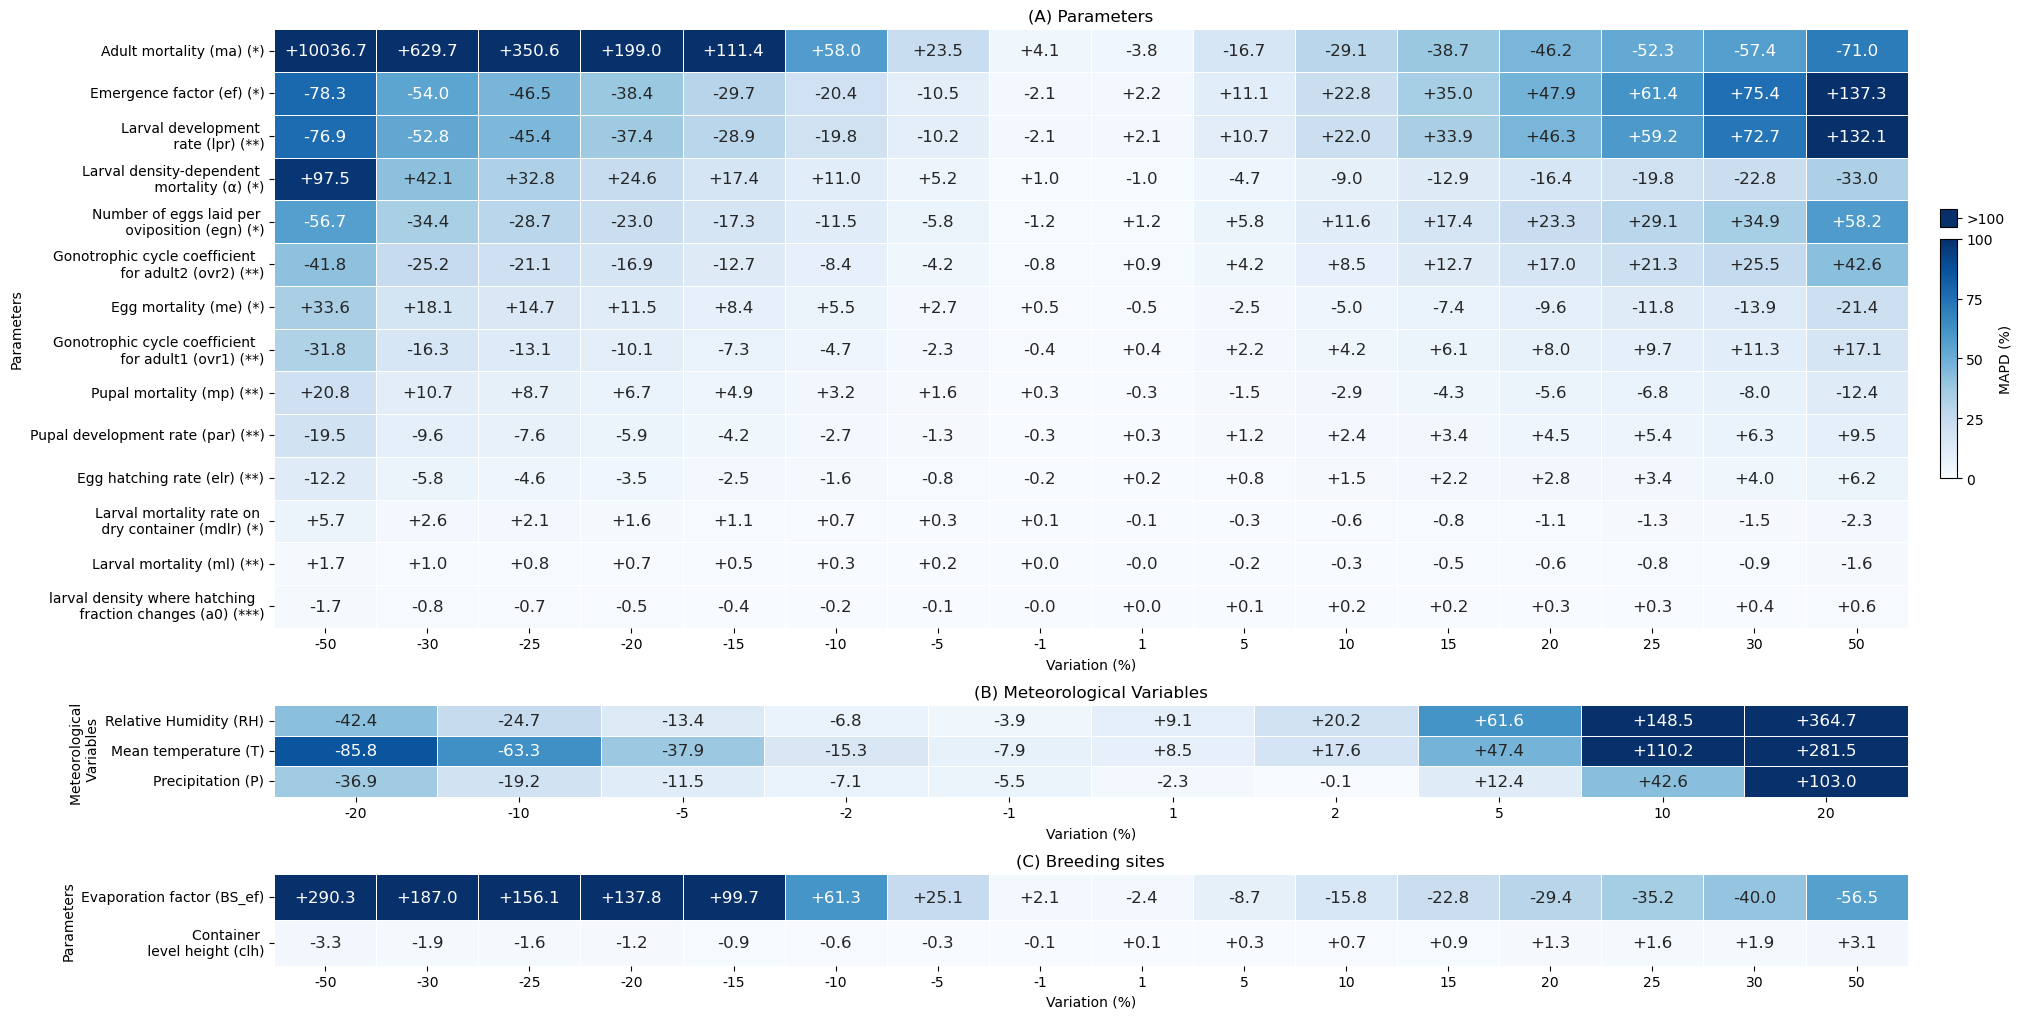

In [5]:
plt.style.use('default')
cmap_blue_darkest = mcolors.ListedColormap(['#08306b'])

fig = plt.figure(figsize=(20, 10))

# ********************** PLOT 1a ***************************
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=4)
cmap_blues = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(pivot_mapd1, annot=pivot_mapd_with_sign1, cmap=cmap_blues, fmt='', linewidths=0.5, 
            mask=pivot_mapd1 > 100, annot_kws={'size': 12}, vmin=0, vmax=100, cbar=False, ax=ax1)
sns.heatmap(pivot_mapd1, annot=pivot_mapd_with_sign1, cmap=cmap_blue_darkest, fmt='', linewidths=0.5, 
            mask=pivot_mapd1 <= 100, annot_kws={'size': 12}, vmin=100, vmax=pivot_mapd1.max().max(), cbar=False, ax=ax1)
ax1.set_xlabel("Variation (%)", fontsize=10)
ax1.set_title("(A) Parameters", fontsize=12)
ax1.set_ylabel("Parameters", fontsize=10)
ax1.tick_params(labelsize=10)

# Scalecolor
# 0 to 100
cbar_ax1 = plt.gca().inset_axes([1.02, 0.25, 0.01, 0.4]) 
cbar1 = plt.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=100), cmap=cmap_blues), cax=cbar_ax1)
cbar1.set_label('MAPD (%)')
ticks = [0, 25, 50, 75, 100]
cbar1.set_ticks(ticks) 
cbar1.set_ticklabels([f'{tick}' for tick in ticks])

# > 100
cbar_ax2 = plt.gca().inset_axes([1.02, 0.67, 0.01, 0.03])
cbar2 = plt.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=100, vmax=100), cmap=cmap_blue_darkest), cax=cbar_ax2)
cbar2.set_ticks([100])
cbar2.ax.set_yticklabels(['>100'])
cbar2.ax.yaxis.set_tick_params(labelsize=10)


# ********************** PLOT 1b ***************************
ax2 = plt.subplot2grid((6, 1), (4, 0))
sns.heatmap(pivot_mapd2, annot=pivot_mapd_with_sign2, cmap=cmap_blues, fmt='', linewidths=0.5, 
            mask=pivot_mapd2 > 100, annot_kws={'size': 12}, vmin=0, vmax=100, cbar=False, ax=ax2)
sns.heatmap(pivot_mapd2, annot=pivot_mapd_with_sign2, cmap=cmap_blue_darkest, fmt='', linewidths=0.5, 
            mask=pivot_mapd2 <= 100, annot_kws={'size': 12}, vmin=100, vmax=pivot_mapd2.max().max(), cbar=False, ax=ax2)
ax2.set_title("(B) Meteorological Variables", fontsize=12)
ax2.set_xlabel("Variation (%)", fontsize=10)
ax2.set_ylabel("Meteorological \n Variables", fontsize=10)
ax2.tick_params(labelsize=10)

# ********************** PLOT 1c ***************************
ax3 = plt.subplot2grid((6, 1), (5, 0))
sns.heatmap(pivot_mapd3, annot=pivot_mapd_with_sign3, cmap=cmap_blues, fmt='', linewidths=0.5, 
            mask=pivot_mapd3 > 100, annot_kws={'size': 12}, vmin=0, vmax=100, cbar=False, ax=ax3)
sns.heatmap(pivot_mapd3, annot=pivot_mapd_with_sign3, cmap=cmap_blue_darkest, fmt='', linewidths=0.5, 
            mask=pivot_mapd3 <= 100, annot_kws={'size': 12}, vmin=100, vmax=pivot_mapd3.max().max(), cbar=False, ax=ax3)
ax3.set_title("(C) Breeding sites", fontsize=12)
ax3.set_xlabel("Variation (%)", fontsize=10)
ax3.set_ylabel("Parameters", fontsize=10)
ax3.tick_params(labelsize=10)
plt.xticks(rotation=0)

plt.tight_layout(pad=0., w_pad=0., h_pad=1.0)

# Save and show
#plt.savefig('figure1.png', bbox_inches='tight', dpi=300)
plt.show()


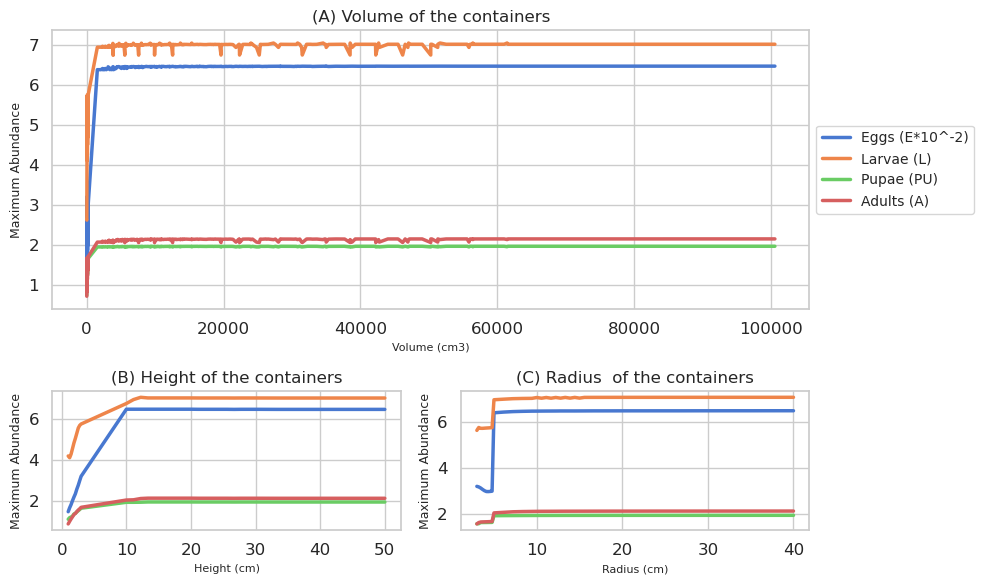

In [6]:
# ********************** PLOT 2 ***************************
# Simulations
results_path = "/home/tomas/aedes/parameters/sensitivity_results_contenedores"

# List
results = []

# Function to extract volume, height and radius from file name
def extract_parameters_from_filename(filename):
    parts = filename.split('_volume_')[1].split('_')
    volume = int(parts[0])  # Extraer volumen
    height = float(parts[1][1:])  # Extraer altura
    radius = float(parts[2][1:-4])  # Extraer radio
    return volume, height, radius

# Read each generated CSV file
for file_name in os.listdir(results_path):
    if file_name.endswith('.csv'):
        volume, height, radius = extract_parameters_from_filename(file_name)
        
        df = pd.read_csv(os.path.join(results_path, file_name))
        
        max_E = df['E'].max() * 0.01
        max_L = df['L'].max()
        max_PU = df['PU'].max()
        max_A = df['A'].max()

        results.append({
            'volume': volume,
            'height': height,
            'radius': radius,
            'max_E': max_E,
            'max_L': max_L,
            'max_PU': max_PU,
            'max_A': max_A
        })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Group by volume, height and radius, and calculate the metrics for each one
grouped_results_volume = results_df.groupby('volume').agg({
    'max_E': 'max',
    'max_L': 'max',
    'max_PU': 'max',
    'max_A': 'max'
}).reset_index()

grouped_results_height = results_df.groupby('height').agg({
    'max_E': 'max',
    'max_L': 'max',
    'max_PU': 'max',
    'max_A': 'max'
}).reset_index()

grouped_results_radius = results_df.groupby('radius').agg({
    'max_E': 'max',
    'max_L': 'max',
    'max_PU': 'max',
    'max_A': 'max'
}).reset_index()

sns.set_theme(style="whitegrid", palette="muted")

# Plots
fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(2, 2, height_ratios=[2, 1])

ax_volume = fig.add_subplot(gs[0, :])
colors = sns.color_palette("muted")
markers = ['o', 's', 'D', '^'] 
line_styles = ['-', '--', '-.', ':']

def plot_metrics(ax, x, y_values, labels, colors, markers, line_styles, title, xlabel, show_legend=False):
    for i, label in enumerate(labels):
        sns.lineplot(x=x, y=y_values[i], ax=ax, label=label, color=colors[i], markersize=10, linewidth=2.5)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel('Maximum Abundance', fontsize=9)
    if show_legend:
        ax.legend(fontsize=10)
    else:
        ax.get_legend().remove()
    ax.tick_params(axis='both', labelsize=12)


# ********************** PLOT 2a ***************************
plot_metrics(ax_volume, grouped_results_volume['volume'], 
             [grouped_results_volume['max_E'], grouped_results_volume['max_L'], grouped_results_volume['max_PU'], grouped_results_volume['max_A']], 
             ['Eggs (E*10^-2)', 'Larvae (L)', 'Pupae (PU)', 'Adults (A)'], 
             colors, markers, line_styles, 
             '(A) Volume of the containers', 'Volume (cm3)', show_legend=True)

ax_volume.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# ********************** PLOT 2b ***************************
ax_height = fig.add_subplot(gs[1, 0])
plot_metrics(ax_height, grouped_results_height['height'], 
             [grouped_results_height['max_E'], grouped_results_height['max_L'], grouped_results_height['max_PU'], grouped_results_height['max_A']], 
             ['Eggs (E*10^-2)', 'Larvae (L)', 'Pupae (PU)', 'Adults (A)'], 
             colors, markers, line_styles, 
             '(B) Height of the containers', 'Height (cm)', show_legend=False)

# ********************** PLOT 2c ***************************
ax_radius = fig.add_subplot(gs[1, 1])
plot_metrics(ax_radius, grouped_results_radius['radius'], 
             [grouped_results_radius['max_E'], grouped_results_radius['max_L'], grouped_results_radius['max_PU'], grouped_results_radius['max_A']], 
             ['Eggs (E*10^-2)', 'Larvae (L)', 'Pupae (PU)', 'Adults (A)'], 
             colors, markers, line_styles, 
             '(C) Radius  of the containers', 'Radius (cm)', show_legend=False)

plt.tight_layout()

#save and show
#plt.savefig('figure3.png', bbox_inches='tight', dpi=300)
plt.show()